This assignment will be reviewed by peers based upon a given rubric. Make sure to keep your answers clear and concise while demonstrating an understanding of the material. Be sure to give all requested information in markdown cells. It is recommended to utilize Latex.

### Problem 1

The Birthday Problem: This is a classic problem that has a nonintuitive answer.  Suppose there are $N$ students in a room.

#### Part a)

What is the probability that at least two of them have the same birthday (month and day)?  (Assume that each day is equally likely to be a student's birthday and that there are no sets of twins.)

Note: Jupyter has two types of cells: Programming and Markdown. Programming is where you will create and run R code. The Markdown cells are where you will type out expalantions and mathematical expressions. [Here](https://www.markdownguide.org/basic-syntax/) is a document on Markdown some basic markdwon syntax. Also feel free to look at the underlying markdown of any of the provided cells to see how we use markdown.

In [ ]:
(Assuming there are 365 days per year)

The number days that each date is unique: 365!
The number of birthdays of N students that each one is unique: 365! / (365 - N)!
The number of possible birthdays of N students: 365**N
The probability that none of the students have the same birthday: 365! / (365 - N)! / 365**N

Hence, the probability that at least two of them have the same birthday: 1 - 365! / (365 - N)! / 365**N

#### Part b)

How large must $N$ be so that the probability that at least two of them have the same birthday is at least 1/2?

23 <= N <= 365

#### Part c)

Plot the number of students on the $x$-axis versus the probability that at least two of them have the same birthday
on the $y$-axis.

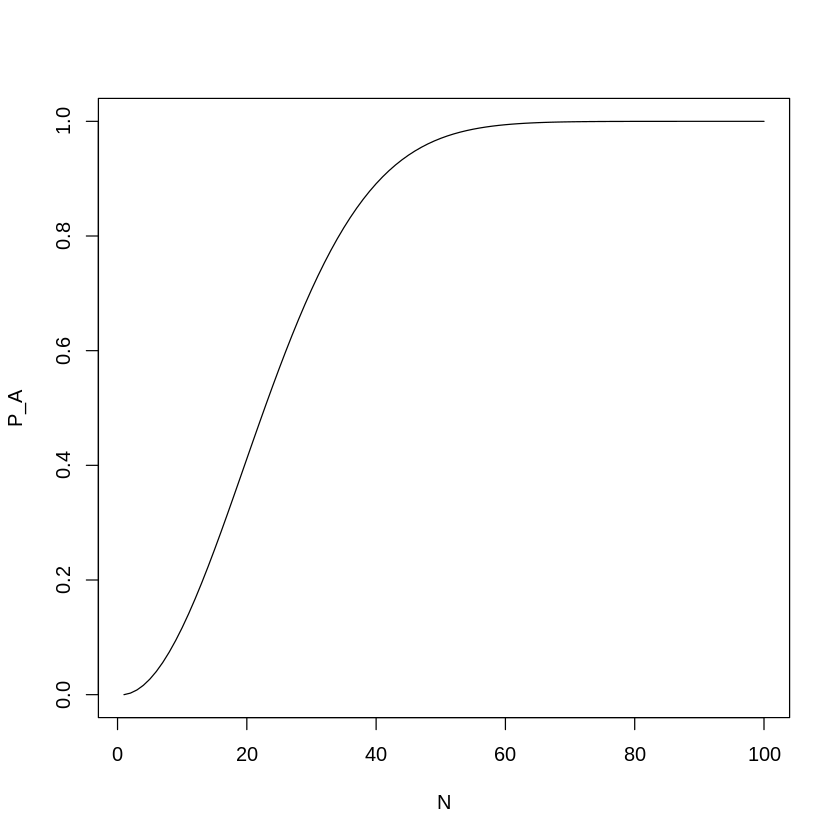

In [103]:
N = seq(1,100)
P_A = rep(0,100)
for (i in N){
    factor = 1
    for (j in seq(365,365-i+1)){
        factor = factor*j
    }
    P_A[i] = 1 - factor/(365^i)
}
plot(N,P_A, type = "l")

#### Thought Question (Ungraded)

Thought question (Ungraded): Would you be surprised if there were 100 students in the room and no two of them had the same birthday?  What
would that tell you about that set of students?

Yes because as shown in the graph above, the probability in this case is almost 100%. The set of the student is large enough to find at least 2 of them have the same birthday (could be more pairs).

# Problem 2 

One of the most beneficial aspects of R, when it comes to probability, is that it allows us to simulate data and random events. In the following problem, you are going to become familiar with these simulation functions and techniques.

**Part a)** 

Let $X$ be a random variable for the number rolled on a fair, six-sided die. How would we go about simulating $X$?

Start by creating a list of numbers [1, 6]. Then use the `sample()` function with our list of numbers to simulate **a single** roll of the die, as in simulate $X$. We would recommend looking at the documentation for `sample()`, found [here](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/sample), or by executing `?sample` in a Jupyter cell.

In [40]:
X <- 1:6
sample(X)[1]

[1] 6

In [104]:
rolls = 1:6
sample(rolls, 1)

[1] 2

**Part b)** 

In our initial problem, we said that $X$ comes from a fair die, meaning each value is equally likely to be rolled. Because our die has $6$ sides, each side should appear about $1/6^{th}$ of the time. How would we confirm that our simulation is fair?

What if we generate multiple instances of $X$? That way, we could compare if the simulated probabilities match the theoretical probabilities (i.e. are all $1/6$).

Generate $12$ instances of $X$ and calculate the proportion of occurances for each face. Do your simulated results appear to come from a fair die? Now generate $120$ instances of $X$ and look at the proportion of each face. What do you notice?

Note: Each time you run your simulations, you will get different values. If you want to guarantee that your simulation will result in the same values each time, use the `set.seed()` function. This function will allow your simulations to be reproducable.

In [106]:
set.seed(112358)
X = sample(c(1:6), 12, replace = TRUE)
print(length(sample(X[X == 1])) / 12)
print(length(sample(X[X == 2])) / 12)
print(length(sample(X[X == 3])) / 12)
print(length(sample(X[X == 4])) / 12)
print(length(sample(X[X == 5])) / 12)
print(length(sample(X[X == 6])) / 12)

[1] 0.08333333
[1] 0.25
[1] 0.25
[1] 0.1666667
[1] 0.4166667
[1] 0.1666667


In [105]:
set.seed(112358)
# Generate 12 samples
n = 12
sample.12 = sample(rolls, n, replace=TRUE)
# Calculate the proportion of occurrences for each face
table(sample.12) / n

sample.12
         1          2          3          4          5          6 
0.08333333 0.25000000 0.25000000 0.16666667 0.08333333 0.16666667 

In [81]:
set.seed(112358)
X = sample(c(1:6), 120, replace = TRUE)
print(length(sample(X[X == 1])) / 120)
print(length(sample(X[X == 2])) / 120)
print(length(sample(X[X == 3])) / 120)
print(length(sample(X[X == 4])) / 120)
print(length(sample(X[X == 5])) / 120)
print(length(sample(X[X == 6])) / 120)

[1] 0.1583333
[1] 0.1666667
[1] 0.2333333
[1] 0.1583333
[1] 0.1333333
[1] 0.15


In [107]:
n = 120
sample.120 = sample(rolls, n, replace=TRUE)
# Calculate the proportion of occur aces for each face
table(sample.120) / n

sample.120
        1         2         3         4         5         6 
0.1916667 0.1333333 0.2166667 0.1666667 0.1500000 0.1416667 

**Part c)** 

What if our die is not fair? How would we simulate that?

Let's assume that $Y$ comes from an unfair six-sided die, where $P(Y=3)=1/2$ and all other face values have an equal probability of occuring. Use the `sample()` function to simulate this situation. Then display the proportion of each face value, to confirm that the faces occur with the desired probabilities. Make sure that $n$ is large enough to be confident in your answer.

In [85]:
x <- sample.int(3, 3, replace = TRUE)